In [1]:
from PIL import Image
import requests
from io import BytesIO

In [2]:
image_urls = [
    "https://upload.wikimedia.org/wikipedia/commons/e/e8/The_Joker_at_Wax_Museum_Plus.jpg", # Joker image
    "https://upload.wikimedia.org/wikipedia/en/9/98/Joker_%28DC_Comics_character%29.jpg" # Joker image
]

images = []
for url in image_urls:
    response = requests.get(url)
    image = Image.open(BytesIO(response.content)).convert("RGB")
    images.append(image)

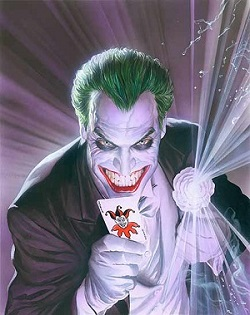

In [ ]:
images[0]

In [ ]:
from smolagents import CodeAgent, OpenAIServerModel

model = OpenAIServerModel(model_id="gpt-4o")

# Instantiate the agent
agent = CodeAgent(
    tools=[],
    model=model,
    max_steps=20,
    verbosity_level=2
)

response = agent.run(
    """
    Describe the costume and makeup that the comic character in these photos is wearing and return the description.
    Tell me if the guest is The Joker or Wonder Woman.
    """,
    images=images
)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Describe the costume and makeup that the comic character in these photos is wearing and return the description. │
│     Tell me if the guest is The Joker or Wonder Woman.                                                          │
│                                                                                                                 │
╰─ OpenAIServerModel - gpt-4o ────────────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Error in generating model output:
Error code: 401 - {'error': {'message': 'Incorrect API key provided: 
AIzaSyBS***************************************************odel. You can find your API key at 
https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 
'invalid_api_key'}}

[Step 1: Duration 2.05 seconds]

AgentGenerationError: Error in generating model output:
Error code: 401 - {'error': {'message': 'Incorrect API key provided: AIzaSyBS***************************************************odel. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

In [7]:
response

<Response [200]>